# Discovery and Representation of Open Making Related Terms

Bulent Ozel, UZH

```bulent.ozel@gmail.com```

## 1. Objective

This notebook sketches the initial exercise on identifiying a weighted set of key terms using a specific corpus.

The method outlined here aims to set-up a base line for future improvements. See the relevant sections below.
 * It uses a statistical approach combined with standardized procedures that are widely applied in standard NLP workflows.
 * In this base line, it aims to present a work flow that can be ablied to
     * different languages
     * differrent problem domains
 * It relies on a domain specific corpus as a foreground corpus and a reference corpus as the background corpus
 * In this work flow specific corpus is formed via supervised crawling on the wikipedia
 * In the exercises below the NLTK's Brown corpus is used as the reference background corpus. However, in the next work round, we aim to use full Wikipedia corpus under the same language of the specific corpus or a reprsentative random sample of it. 
 * The normalized comparison of candidate keywords within specific vs reference corpus is used as a proxy indication of the relevance of the candidate keyword for the given topic that is reprseneted by the collection of articles under the specific corpus.

## 2. Overall Work Flow
In short, the workflow presented on this notebook is the second stage on a workflow objective of which is being able to measure relevance of a given external input to a specific theme, issue or topic. The steps of the work flow is as follows.

1. Forming a specific corpus where the corpus consists of set of documents around a topic. The corpus could be
    - a set of blog articles around an issue let say green finance
    - or a set of Wikipedia articles around the same subject
    - or collection of news articles around the green finance
    - or collection of tweets around the same issue.
    
    At the moment we have another module that given a set of seed Wikipedia articles around an issue the crawler scrapes textual data from articles. For the details of the module please [see the scraper module.](https://github.com/bulentozel/OpenMaker/tree/master/Scraping). The output of that module is a set of input texts stored in a collection in JSON format. 

2. Given an input set of texts on a theme a concept or a topic identify set of terms that more likely or less likely can occur within a discussion on the topic. This module hereby presents one of the simple methods for this purpose.

3. Given a list of weighted terms which are more likely to occur or reprsent a theme, concept or topic and input query text measure the relevance of the input text to the topic/theme/concept. [The notebook in this link](https://github.com/bulentozel/OpenMaker/blob/master/Semantics/Score%20Text.ipynb) demonstrates one way doing such scoring of a given text against the curated set of terms of this particular module.




## 3. Work-flow Process in this Particular Module
1. Loading the reference corpus and a topic specific corpus
2. Tokenizing and cleaning the reference corpus and the specific corpus
3. Calculating term frequency counts of the reference corpus and the specific corpus
4. Identifying common terms in both corpuses
5. Identifying distinctive terms that occur in the specific corpus but not in reference corpus, if any
6. Reducing the terms in the dinstinctive set by an iterative manual inspection process as well as by  using a curated list of distinctive terms on the topic.
7. Computing likelihood ratio (empirical probabilities) of the terms that are observed in the specific topic
8. Tabulating identified list of terms, their raw frequencies and weights.

## 4. Suggested Future Work

* Using language specicif term frequency counts of Wikipedia itself for comparisons. In NLP terminology, the *foreground* corpus around a topic needs to be compared and contrasted to a *background* corpus.

* Improving the semantic crawler of the previous stage to be able to increase quality of the specific corpuses

* Adding new scoring types that measures relevance of a given term to a given topic.

### Methodological Improvements
* Instead of tokenizing all terms, examine possibilities of key-phrase extrcation combining with *tf-idf* and 
    - experiment with extracting noun phrases and words, for this use NLTK's regular expression module for POS (part of speeach) analysis.
    - extract n-grams where n=1,2,3

## 5. Definitions and Assumptions

### Assumptions
* In the current state of the task it is assumed that a document's terms tend to be relatively frequent within the document as compared to an external reference corpus. However, it should be noted this assumption is contested in the field. See the paper by Chuang et el.

* Condidering the fact that the crawler is used to aggregate semantically related set of documents into a single document, *tf x idf* is equivalent to *tf*. As can be seen below, we use a normalized version of *tf*: *ntS / NS*.

* Fewer number of but relatively more relevant training (input corpus) is prefered in order to reduce term extraction problems due to length of documents. However, it should be noted that the crawling depth of an identiefied wiki article from stage 1 of this document can be used as an additional weight on relevance/reprsesntation of keywords.

* We have limited ourselves to terms instead of n-grams and phrases or use of POS to be able to develop a base model that can work on different languages.
 
 
### Term
Given for instance a set of texts around open source software movement a term that is identified can be a word such as *openness*, a person such as *Stallman* a license type such as *GNU*, an acronym for an organization such as *FSF* the Free Software Foundation, or a technology such as *Emacs*.

### Likelihood ratio
It is a simple measure computed comparing frequency count of a term in a specific corpus versus its frequency count in the reference reference corpus. Here assumption is that the reference corpus is a large enough sample of the language at observing the occurance of a term. Then having a higher/lower observation frequency of a term in the specific corpus is a proxy indicator for the term choice while having a debate on the topic.

The likelihood ratio for a term P_t is calculated as:

P_t = log ( (ntS/NS) / (ntR/NR) )

where

- *ntS* is the raw frequency count of the term in the entire specific corpus
- *ntR* is the raw frequenccy count of the term in the reference corpus
- *NS* is the total number of terms in the specific corpus
- *NR* is the total number of terms in the reference corpus

It should be noted that frequency counts are calculated after having applied the same tokenization and post processing such as excluding stop-words, pancuations, rare terms, etc both on the reference corpus and the specific corpus.

## 6. State of the art 

* Survey Paper: Kazi Saidul Hasan and Vincent Ng, 2014. “Automatic Keyphrase Extraction: A Survey of the State of the Art” Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics, pages 1262–1273.

* Survey Paper: Sifatullah Siddiqi and Aditi Sharan. Article: Keyword and Keyphrase Extraction Techniques: A Literature Review. International Journal of Computer Applications 109(2):18-23, January 2015

* Survey Paper: Z. A. Merrouni, B. Frikh, and B. Ouhbi. Automatic keyphrase extraction: An overview of the state of the art. In 2016 4th IEEE
Colloquium on Information Science and Technology
(CiSt), pages 306–313, Oct 2016

* PageRank - Topical: Zhiyuan Liu, Wenyi Huang, Yabin Zheng and Maosong Sun, 2010. “Automatic Keyphrase Extraction via Topic Decomposition”. Proceeding EMNLP '10 Proceedings of the 2010 Conference on Empirical Methods in Natural Language Processing Pages 366-376 

* RAKE (Rapid Automatic Keyword Extraction ): Stuart Rose, Dave Engel, Nick Cramer, and Wendy Cowley. Automatic
keyword extraction from individual documents. Text Mining, pages 1–20, 2010.

* TextRank - Graph Based : Rada Mihalcea and Paul Tarau. Textrank: Bringing order into texts.
Association for Computational Linguistics, 2004.

* STOPWORDS: S. Popova, L. Kovriguina, D. Mouromtsev, and I. Khodyrev. Stopwords
in keyphrase extraction problem. In 14th Conference

* Corpus Similarity - Keyword frequency based: Adam Kilgarriff. Using word frequency lists to measure corpus homogeneity and similarity between corpora. In Proceedings of ACLSIGDAT Workshop on very large corpora, pages 231–245, 1997.

* Recommendation - Keyphrase Based: F. Ferrara, N. Pudota and C. Tasso. A keyphrase-based paper recommender system. In: Digital Libraries and Archives. Springer Berlin Heidelberg, 2011. p. 14-25.

* Jason Chuang, Christopher D. Manning, Jeffrey Heer, 2012. "Without the Clutter of Unimportant Words": Descriptive Keyphrases for Text Visualization" ACM Trans. on Computer-Human Interaction, 19(3), 1–29.

## Appendix

### Scoring

Using the outcome of this technique to score arbitrary input texts against a single issue such as financial sustainability or against a set of issues such as the 10 basic human values requires a set of normalization of the raw scores and their rescaling/transformation.

The factors that need to be considered are:

- **Differing document lengths:** The likelihood of repetion of a key phrase increases as the size of the input text gets larger. In more concrete terms, when a scoring that simply sums up detection of weighted keyphrases or words within a given input text would be very sensitive to the document length. For isntance, the an executive summary of an article would very likely get quite lower score than the full article on any issue.

    *Among other methods, this can simply be resolved by computing per word scores, where the word set to be conidered is the tokenized and cleaned set of words that represent the input text.*


- **Topical relevance:** This factor would be important when the subject matter of the inputs texts vary among each other. In other words, this factor would matter to a very high significance, let's say when one wants to compare perceptions of indivuduals on the role of traditions in the personal lives and when this question is not asked them in a uniform manner that under the same social, cultural, environmental and physical conditions.
    
    Let’s assume that issue under investigation is again the perception and role of traditions in personal lives. It is possible that the same blogger with a strong opinion on traditions (i) may not touch the issue while talking on data science, (ii) he would slightly touch the issue while he talks about her preferences in mobile devices (iii) He dives into subject using all keywords and phrases when he talks about impact of traditions on social order. In brief, it is necessary to offset the variability of the topical relavance of an input text to the issue under investigation when arbitrary text samples are used for scoring.
   
    *An offsetting scheme can be devised when opinion or perception of an actor is to be measured with respect to more than one factor that define the issue under investigation. For instance, when we want to measure the position of a political leader on individual liberties vs social security or when we want to profile discourse of the political leader as of a ten basic human values we could employ some simple statistical methods in order to offset the topical relevance of the discourses or the speeches of the political figure to what we would like to measure.*
    
    *A simple method could be rescaling the scores on each sub factor such as the scores of liberty and security that are measured from the same speech into a range of -1 to 1. This can simply be done by taking the mean of the two and then deducting the mean from each score and scaling them into a scala of -1 to 1. This way it may be possible to use multiple speeches of the same political figure on different topics to evalaute his or her postion on liberty vs security matter.*
   
   In statistical terms this problem corresponds to adjusting or normalizing ratings or scores measured on different scales to a notionally common scale. Given the fact that in most cases a normal distribution for underlying factors may not be assumed the quantile-normalization technique is suggested. The quantile normalization sorts and ranks the variables with a non-negative amplitudes. Then these rankings can be scaled to for instance to a 0-1 interval. 


- **Level of subjectivity**.  This is variability in terms of relevant importance attributed to each issue given a set of issues. For instance, according to a study (Schwartz 2012), it is seen that almost all cultures around the world attach a higher importance to ‘universalism’ human value than the ’power’ basic human value. So when the objective of the scoring is not simply to rank of importance attached to each of them, then a comparative importance with respect to overall observations needs to be tackled.

    *Observed variances in each query texts can be considered. That is, a simple statistical methods can be used for instance to be able to compare two or more query texts with respect to each other. A suggested method would be (1) estimate coefficient of variation for each input text using per-word scores (2) the rescale quantile-normalized scores that is suggested above using the estimated coefficient of variation in each case.*
    
    *When this rescaling is applied for instance to universalism versus power or liberty vs security the coeffcient of variation would act as a polarization measure.*

#### Scoring and value system profiling

When one attempts to use scores, for instance, around the basic ten human values and one wants to construct the value system of the person, then both ranking of the scores as well as the relevant importance of each score from a number of texts from the same person should be taken into consideration.



## External python modules
The notebook below should work with both Pyhton 2 and Python 3 kernels.

In [6]:
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re, copy
import pprint as pp

import pandas as pd

## Implemented: packages, modules, objects and functions
*Still under construction!*

In [7]:
from utils import tokenizer

In [75]:
class Corpus(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        texts_raw (:obj:`json`): A JSON collection of raw texts of the corpus.
        
        texts_clean (:obj:`json`): A JSON collection of cleaned/processed
            texts of the corpus.
        
        tf_idf (:obj:`json`): Tf-Idf analyses of the corpus (to be implemented).
        
    """

    def __init__(self, tf_dist, stemmer = None):
        """The class constructor.

        Args:
            tf_dist (:obj:`nltk.FreqDist`): An NLTK container for tokenized and analyzed
            terms in the corpus.
            stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function (default None)

        """
        self.tf_dist = tf_dist
        self.stemmer = stemmer if stemmer else lambda x:x
        self.stems = None
        
    def get_top_frequents(self, top=42):
        """The method identifies and returns top frequent terms.
        
        Args:
            top (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for top terms as list of tuples of term and frequency pairs.

        """
        return self.tf_dist.most_common(top)
    
    def get_least_frequents(self, bottom=42):
        """The method identifies and returns least frequent terms.
        
        Args:
            bottom (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the least frequent terms as list of tuples of term and frequency pairs.

        """
        _n = self.get_count_uniques()
        slice_from = _n - bottom if _n > bottom else 0
        return self.tf_dist.most_common(_n)[slice_from:]
    
    def get_count_uniques(self):
        """The method identifies and returns top frequent terms.
            
        Returns:
            (int): Returns an integer.

        """
        #return len(self.tf_dist.keys())
        return self.tf_dist.B()

    def get_size(self):
        """The returns the size of the corpus in terms of number of terms it has.
            
        Returns:
            (int): Returns an integer. It is summation of raw frequency counts.

        """
        #return sum(self.tf_dist.values())
        return self.tf_dist.N()
    
    def union(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the union of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the union.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of union of terms in both cases.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the union terms, ff as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.
        
        Examples:
            >>> Corpus(FreqDist('abbbc')).union(Corpus(FreqDist('bccd')), stats = True)
            [('a', 1), ('b', 3), ('c', 2), ('d', 1)]

        """
        Union = self.tf_dist | other.tf_dist
        if not as_corpus and not stats: return list(Union.keys())
        if not as_corpus and stats: return list(Union.items())
        return Corpus(Union)
    
    def intersection(self, other,
                     as_corpus = False,
                     stats = False):
        """The method identifies and returns the intersection of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the intersections.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of joint terms.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the joint terms, if as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.

        """
        Common = self.tf_dist & other.tf_dist
        if not as_corpus and not stats: return list(Common.keys())
        if not as_corpus and stats: return list(Common.items())
        return Corpus(Common)
    
    def difference(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the difference of the self from the other.
        
        Note:
            Implementation needs style and refactoring.
            
        Args:
            other (:obj:`Corpus`): An instance of this Corpus Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the difference set.
            
        Returns:
            
        """
        joint = set(self.intersection(other))
        difference = set(self.tf_dist.keys()).difference(joint)
        return {k:v for k, v in self.tf_dist.items() if k in difference}
    
    def plot(self, top, cumulative = False):
        """Plotting.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        self.tf_dist.plot(top, cumulative = cumulative)
        return True
    
    def tabulate(self, top):
        """Tabulating.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        self.tf_dist.tabulate(top) 
        return True
    
    def list_terms(self):
        """.
        
        Note:
            Implementation needs style and refactoring.
            
        Returns:
            
        """
        return list(sorted(self.tf_dist.keys()))

    
    def set_stemmer(self, stemmer):
        """The appointing a new stemmer function to the corpus.
        
        Args:
            stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function (default None)
            
        Returns:
            (:obj:`bool`): True
            
        """
        
        self.stemmer = stemmer
        return True
        
    
    def compute_stems(self):
        """The function returns the a dictionary of terms and their corresponding stems.
        
        Args:
            stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function (default None)
            
        Returns:
            (:obj:`bool`): True
            
        """
        self.stems = {k: self.stemmer(k) for k in self.list_terms()}
        return True
    
    
    def get_stems(self):
        """The function returns the a dictionary of terms and their corresponding stems.
        
        Args:
            
        Returns:
            (:obj:`dict`): A dictionary of {term:stem of the term}.
            
        """
        if self.stems: return self.stems
        self.compute_stems()
        return self.stems
        
        
        
        
        

In [9]:
def format_output_fname(current_theme):
    output_fname = "_".join([word.capitalize() for word in current_theme.split(" ")])
    return output_fname

In [10]:
## All of these functions will become methods of wikicorpus.

def display_documents_list(Corpus, tid=None):
    """List the articles meta data and crawling information on them.
    
    
    """
    print('document.id :: theme.id :: theme :: depth :: url')
    
    articles = Corpus
    if tid:
        articles = [article for article in articles if article['theme.id'] == tid]   
    
    articles = sorted(articles, key=lambda x: (x['theme.id'], x['depth'])) 
    for article in articles:
        print(article['document.id'],article['theme.id'], article['theme'], article['depth'], article['url'])
        
def list_themes(Corpus):
    """ 
        Note: Document counts added.
    """
    themes = dict()
    count = 0
    for article in Corpus:
        theme_id = article['theme.id']
        if theme_id not in themes.keys():
            themes[theme_id] = (article['theme'], 0)
        else:
            t,c = themes[theme_id]
            c += 1
            themes[theme_id] = (t, c)
            
    themes = [{'id':k, 'name':v[0], 'count':v[1]} for k,v in themes.items()]
    return themes

def get_theme_title(Corpus, theme_id):
    title = None
    for article in Corpus:
        if article['theme.id'] == theme_id:
            title = article['theme']
            break
    return title

def get_theme_id(Corpus, theme_name):
    theme_id = None
    for article in Corpus:
        if article['theme'] == theme_name:
            theme_id = article['theme.id']
            break
    return int(theme_id)

def get_document_fields(Corpus):
    fields = list()
    assert isinstance(Corpus, list), '{} must have been a non-empty list of dict objects'
    
    if len(Corpus):
        fields = Corpus[0].keys()
        
    return fields

def filter_corpus(Corpus, themes, docs_to_drop = [], func = None):
    themes = list(map(lambda x: int(x), themes))
    docs = [page for page in Corpus if int(page['theme.id']) in themes]
    docs = [p for p in docs if p['document.id'] not in docs_to_drop]
    if  func:
        docs = [p for p in docs if func(p)]
    return docs

def merge_documents(Corpus, by_theme_id = None, by_doc_ids = [], marker = "\n"):
    docs = Corpus
    if by_theme_id:
        docs = [d for d in docs if d['theme.id'] == by_theme_id] 
    if by_doc_ids:
        docs = [d for d in docs if d['document.id'] in by_doc_ids]
    texts = [d['text'] for d in docs]
    text = marker.join(texts)
    return(text)

In [11]:
class WikiCorpus(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        collection_json (str): This is a filename to the scraped data.
    
    """
    
    collection_json = "data/corpuses/achievement.json"

    def __init__(self, collection=None):
        """The class constructor.

        Args:
            collection (str, optional): A filename to a previously scraped data.

        """
        if collection: self.collection_json = collection
        self.load_corpus()
        
    def load_corpus():
        pass    

In [12]:
class TextCleaner(object):
    """A generic class for foreground or background corpuses created by the package.

    Attributes:
        collection_json (str): This is a filename to the scraped data.
    
    """
    
    try:
        from utils import tokenizer
    except:
        raise  ImportError("It wasn't possible to import 'utils.tokenizer.")
    

    def __init__(self, stopwords = None):
        """The class constructor.

        Args:
            stopwords (:obj:`list` of :obj:`str`, optional): list of stopwords.

        """
        self.stopwords = stopwords
        
    def load_stopwords(self, spointer):
        """The method reloads a new stopwords list.

        Note:
            Internal stopword is overwritten.
            
        Args:
            spointer (:obj:`list` of :obj:`str`or :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            self.stopwords = set(spointer)
            return True
        
        with open(spointer, "r") as f:
            self.stopwords = set(f.read().strip().split("\n"))
            
        return True
    
    def extend_stopwords(self, spointer):
        """The method extends a new stopwords list.
            
        Args:
            spointer (:obj:`list` of :obj:`str`, :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            sws = set(spointer)
        else:
            with open(spointer, "r") as f:
                newwords = set(f.read().strip().split("\n"))
                sws = set(newwords)
        if not sws: return False
        self.stopwords = self.stopwords.union(sws) if self.stopwords else sws
        return True
    
    @staticmethod
    def freq_dist(words):
        """The static method computes frequency distribution of a word list.
            
        Args:
            words (:obj:`list` of :obj:`str`, :obj:`str`): list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        return FreqDist([w.lower() for w in words])
    
    def clean(self, words, display_top = 10, logging = True, exceptions = []):
        """Removes panctuations and stopwords from a corpus.
            
        Args:
            words (:obj:`list` of :obj:`str`): The input corpus as list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns the trimmed corpus as the NLTK obj.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        """
        def report(headline, fd):
            """Local method for logging the updates.
            
            Args:
                headline (:obj:`str`): The state description

            Returns:
                bool: True.
            """
            print(headline)
            print('Total term counts: {}'.format(sum(fd.values())))
            pp.pprint(fd.most_common(display_top))
            return True
            
        FD = TextCleaner.freq_dist(words)
        headline = "Initial state:"
        if logging: report(headline, FD)
        
        FD = self.remove_panctuation(FD, exceptions = exceptions)
        headline = "Removing panctuation only terms:"
        if logging: report(headline, FD)

        FD = self.remove_stopwords(FD, exceptions = exceptions)
        headline = "Removing stopwords:"
        if logging: report(headline, FD)
        return FD
        
    
    def remove_panctuation(self, freq_dist, exceptions = []):
        """The static method removes punctuation only terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
            if punctuation in exceptions: continue
            dp = punctuation * 2
            tp = dp + punctuation
            if punctuation in freq_dist.keys():
                del freq_dist[punctuation]
            if dp in freq_dist.keys():
                del freq_dist[dp]
            if tp in freq_dist.keys():
                del freq_dist[tp]
        return freq_dist
    
    def remove_stopwords(self, freq_dist, exceptions = []):
        """The static method removes stopwords.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for term in self.stopwords:
            if term in exceptions: continue
            if term in freq_dist.keys():
                del freq_dist[term]
        return freq_dist
    
    def remove_numerals(self, freq_dist, remove_any = False, exceptions = []):
        """The method removes terms with numeral literals.
            
        Note:
            When remove_any is selected, literals such as 3D would vanish.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            remove_any (bool): If True mumeral and literal mixed terms are removed.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        if remove_any:
            pattern_numbers = re.compile('[0-9]')
            def has_numbers(x):
                return(pattern_numbers.search(x) is not None)
            for term in freq_dist.keys():
                if term in exceptions: continue
                if has_numbers(term):
                    print(term)
                    del freq_distN[term]
        else:
            pattern_letters = re.compile('[a-z]')
            def has_letters(x):
                return(pattern_letters.search(x) is not None)
            for term in freq_dist.keys():
                if term in exceptions: continue
                if not has_letters(term):
                    print(term)
                    del freq_distN[term]
        
        return freq_distN
                
    def remove_short_terms(self, freq_dist, threshold = 1, exceptions = []):
        """The method removes terms that are below a certain length.
        
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            threshold (int): The charcter length of a term (default 1).
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if len(term) <= threshold:
                del freq_distN[term]
        return freq_distN

    def remove_rare_terms(self, freq_dist, below = 3, exceptions = []):
        """The method removes terms that have rare occurances.
        
        Note:
            Such removal may help reduce errenous and random terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            below (int): The minumum allowed frequency count.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if freq_dist[term] < below:
                del freq_distN[term]
        return freq_distN
    

## 1. Preparing corpuses

### 1.1 Loading a reference English language corpus

In [13]:
#nltk.download()
from nltk.corpus import brown

### 1.2. Examining and preparing a theme specific corpus

In [14]:
# load the harvested text from wikipedia.
with open("data/corpuses/schwartz.json", "r") as f: OM_Corpus_text = f.read()
OM_CORPUS = json.loads(OM_Corpus_text)

In [15]:
# The total number of wiki articles used:
print('Number of documents in the corpus: {}\n'.format(len(OM_CORPUS)))

Number of documents in the corpus: 563



In [16]:
# Column names of the the corpus.
get_document_fields(OM_CORPUS)

dict_keys(['theme', 'theme.id', 'document.id', 'title', 'url', 'depth', 'text'])

In [17]:
display_documents_list(OM_CORPUS)

document.id :: theme.id :: theme :: depth :: url
1 1 universalism 0 https://en.wikipedia.org/wiki/Critical_thinking
2 1 universalism 0 https://en.wikipedia.org/wiki/Universalism
3 1 universalism 0 https://en.wikipedia.org/wiki/Wisdom
4 1 universalism 0 https://en.wikipedia.org/wiki/Beauty
5 1 universalism 0 https://en.wikipedia.org/wiki/World_peace
6 1 universalism 0 https://en.wikipedia.org/wiki/Environmental_protection
7 1 universalism 0 https://en.wikipedia.org/wiki/Social_equality
8 1 universalism 0 https://en.wikipedia.org/wiki/Social_justice
10 1 universalism 0 https://en.wikipedia.org/wiki/Egalitarianism
13 1 universalism 0 https://en.wikipedia.org/wiki/Ecology
20 1 universalism 1 https://en.wikipedia.org/wiki/Deductive_reasoning
22 1 universalism 1 https://en.wikipedia.org/wiki/Discourse_analysis
23 1 universalism 1 https://en.wikipedia.org/wiki/Cognitive_bias_mitigation
24 1 universalism 1 https://en.wikipedia.org/wiki/Inductive_reasoning
25 1 universalism 1 https://en.wikiped

202 2 hedonism 1 https://en.wikipedia.org/wiki/Pleasure_principle_(psychology)
204 2 hedonism 1 https://en.wikipedia.org/wiki/Hedonism_Resorts
205 2 hedonism 1 https://en.wikipedia.org/wiki/Psychological_hedonism
206 2 hedonism 1 https://en.wikipedia.org/wiki/Michel_Onfray
207 2 hedonism 1 https://en.wikipedia.org/wiki/Paradox_of_hedonism
208 2 hedonism 1 https://en.wikipedia.org/wiki/Eudaimonia
209 2 hedonism 1 https://en.wikipedia.org/wiki/Torbj%C3%B6rn_T%C3%A4nnsj%C3%B6
210 2 hedonism 1 https://en.wikipedia.org/wiki/Epicureanism
211 2 hedonism 1 https://en.wikipedia.org/wiki/Yangism
212 2 hedonism 1 https://en.wikipedia.org/wiki/Libertine
213 2 hedonism 1 https://en.wikipedia.org/wiki/Cyrenaics
214 2 hedonism 1 https://en.wikipedia.org/wiki/David_Pearce_(philosopher)
215 2 hedonism 1 https://en.wikipedia.org/wiki/Affectionism
218 2 hedonism 1 https://en.wikipedia.org/wiki/Utilitarianism
246 2 hedonism 1 https://en.wikipedia.org/wiki/Sorrow_(emotion)
247 2 hedonism 1 https://en.wikip

In [18]:
list_themes(OM_CORPUS)

[{'count': 205, 'id': 1, 'name': 'universalism'},
 {'count': 85, 'id': 2, 'name': 'hedonism'},
 {'count': 46, 'id': 3, 'name': 'achievement'},
 {'count': 24, 'id': 4, 'name': 'power'},
 {'count': 37, 'id': 5, 'name': 'self-direction'},
 {'count': 57, 'id': 6, 'name': 'benevolence'},
 {'count': 42, 'id': 7, 'name': 'conformity'},
 {'count': 18, 'id': 8, 'name': 'tradition'},
 {'count': 7, 'id': 9, 'name': 'stimulation'},
 {'count': 32, 'id': 10, 'name': 'security'}]

#### 1.2.1 Selecting the specific theme (a sub-corpus).

In [19]:
CURRENT_THEME = 'hedonism'

In [20]:
THEME_ID = get_theme_id(OM_CORPUS, CURRENT_THEME)
display_documents_list(OM_CORPUS, THEME_ID)

document.id :: theme.id :: theme :: depth :: url
9 2 hedonism 0 https://en.wikipedia.org/wiki/Hedonism
11 2 hedonism 0 https://en.wikipedia.org/wiki/Desire
12 2 hedonism 0 https://en.wikipedia.org/wiki/Happiness
14 2 hedonism 0 https://en.wikipedia.org/wiki/Pleasure
36 2 hedonism 1 https://en.wikipedia.org/wiki/Fred_Feldman_(philosopher)
50 2 hedonism 1 https://en.wikipedia.org/wiki/Leisure
51 2 hedonism 1 https://en.wikipedia.org/wiki/Gratification
52 2 hedonism 1 https://en.wikipedia.org/wiki/False_pleasure
53 2 hedonism 1 https://en.wikipedia.org/wiki/Orgasm
61 2 hedonism 1 https://en.wikipedia.org/wiki/Mania
62 2 hedonism 1 https://en.wikipedia.org/wiki/Subjective_well-being
63 2 hedonism 1 https://en.wikipedia.org/wiki/Biopsychosocial_model
64 2 hedonism 1 https://en.wikipedia.org/wiki/Flow_(psychology)
65 2 hedonism 1 https://en.wikipedia.org/wiki/Pain_and_pleasure
68 2 hedonism 1 https://en.wikipedia.org/wiki/Pain
78 2 hedonism 1 https://en.wikipedia.org/wiki/Suffering
79 2 hedo

In [21]:
# Filter out by any user specified creterias:
fcorpus = filter_corpus(OM_CORPUS,
                        themes = [THEME_ID],
                        docs_to_drop = [],
                        func = lambda x: 0 <= x['depth'] < 2)
display_documents_list(fcorpus)

document.id :: theme.id :: theme :: depth :: url
9 2 hedonism 0 https://en.wikipedia.org/wiki/Hedonism
11 2 hedonism 0 https://en.wikipedia.org/wiki/Desire
12 2 hedonism 0 https://en.wikipedia.org/wiki/Happiness
14 2 hedonism 0 https://en.wikipedia.org/wiki/Pleasure
36 2 hedonism 1 https://en.wikipedia.org/wiki/Fred_Feldman_(philosopher)
50 2 hedonism 1 https://en.wikipedia.org/wiki/Leisure
51 2 hedonism 1 https://en.wikipedia.org/wiki/Gratification
52 2 hedonism 1 https://en.wikipedia.org/wiki/False_pleasure
53 2 hedonism 1 https://en.wikipedia.org/wiki/Orgasm
61 2 hedonism 1 https://en.wikipedia.org/wiki/Mania
62 2 hedonism 1 https://en.wikipedia.org/wiki/Subjective_well-being
63 2 hedonism 1 https://en.wikipedia.org/wiki/Biopsychosocial_model
64 2 hedonism 1 https://en.wikipedia.org/wiki/Flow_(psychology)
65 2 hedonism 1 https://en.wikipedia.org/wiki/Pain_and_pleasure
68 2 hedonism 1 https://en.wikipedia.org/wiki/Pain
78 2 hedonism 1 https://en.wikipedia.org/wiki/Suffering
79 2 hedo

In [22]:
# Filter out by document ids
fcorpus = filter_corpus(fcorpus,
                        themes = [THEME_ID],
                        docs_to_drop = []
                       )
display_documents_list(fcorpus)

document.id :: theme.id :: theme :: depth :: url
9 2 hedonism 0 https://en.wikipedia.org/wiki/Hedonism
11 2 hedonism 0 https://en.wikipedia.org/wiki/Desire
12 2 hedonism 0 https://en.wikipedia.org/wiki/Happiness
14 2 hedonism 0 https://en.wikipedia.org/wiki/Pleasure
36 2 hedonism 1 https://en.wikipedia.org/wiki/Fred_Feldman_(philosopher)
50 2 hedonism 1 https://en.wikipedia.org/wiki/Leisure
51 2 hedonism 1 https://en.wikipedia.org/wiki/Gratification
52 2 hedonism 1 https://en.wikipedia.org/wiki/False_pleasure
53 2 hedonism 1 https://en.wikipedia.org/wiki/Orgasm
61 2 hedonism 1 https://en.wikipedia.org/wiki/Mania
62 2 hedonism 1 https://en.wikipedia.org/wiki/Subjective_well-being
63 2 hedonism 1 https://en.wikipedia.org/wiki/Biopsychosocial_model
64 2 hedonism 1 https://en.wikipedia.org/wiki/Flow_(psychology)
65 2 hedonism 1 https://en.wikipedia.org/wiki/Pain_and_pleasure
68 2 hedonism 1 https://en.wikipedia.org/wiki/Pain
78 2 hedonism 1 https://en.wikipedia.org/wiki/Suffering
79 2 hedo

In [23]:
fcorpus_text = merge_documents(fcorpus,
                          by_theme_id = THEME_ID,
                          by_doc_ids = [],
                          marker = " ")
print('Length of the corpus in terms of characters: {}'.format(len(fcorpus_text)))

Length of the corpus in terms of characters: 1380387


In [24]:
error_check_text = '''a aa aaa aaaa  aaaa2 007 a-2 ; - ' + _  ! " = \n \n'''
fcorpus_text =  error_check_text + fcorpus_text
print('Length of the corpus in terms of characters: {}'.format(len(fcorpus_text)))

Length of the corpus in terms of characters: 1380436


## 2. Tokenizing

In [25]:
REFERENCE_CORPUS = nltk.corpus.brown.words()
SPECIFIC_CORPUS = tokenizer.tokenize_strip_non_words(fcorpus_text)

In [26]:
print('Term counts: {} Corpus = {}, Ref Corpus = {}'.format(CURRENT_THEME.capitalize(), len(SPECIFIC_CORPUS), len(REFERENCE_CORPUS)))

Term counts: Hedonism Corpus = 210310, Ref Corpus = 1161192


In [27]:
OUTPUT_FNAME_PREFIX = format_output_fname(CURRENT_THEME)
print('The output file prefix: {}'.format(OUTPUT_FNAME_PREFIX))

The output file prefix: Hedonism


## 3. Cleaning and counting

### 3.1 Forming stopwords list
A domain specific stop-word is added to standard stopwords. Domain specific stopword needs to be extended through iterations or via state of art computational methods.

In [28]:
STOPWORDS_STANDARD = "data/stopwords_standard.txt"
STOPWORDS_SPECIFIC = "data/stopwords_openmaker.txt"

In [29]:
C = TextCleaner()
C.load_stopwords(STOPWORDS_STANDARD)
C.extend_stopwords(STOPWORDS_SPECIFIC)

True

In [30]:
pp.pprint(C.stopwords)

{'10th',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '1st',
 '2nd',
 '3rd',
 '4th',
 '5th',
 '6th',
 '7th',
 '8th',
 '9th',
 'a',
 'about',
 'above',
 'ad',
 'after',
 'again',
 'all',
 'almost',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'bc',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'britannica',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'd',
 'did',
 "didn't",
 'do',
 'doc',
 'does',
 "doesn't",
 'doi',
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'eg',
 'encyclopedia',
 'etc',
 'few',
 'first',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'html',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'ii',
 'iii',
 'in',
 'into',
 'is',
 'isbn',
 "isn't",
 'it',
 "it's",
 'its',
 '

### 3.2 Removing panctuations and stopwords 

In [31]:
test_exceptions = ['a','am'] 
Tf_S = C.clean(SPECIFIC_CORPUS,logging = True, exceptions = test_exceptions)

Initial state:
Total term counts: 210310
[('the', 10170),
 ('of', 7838),
 ('and', 6343),
 ('to', 5170),
 ('in', 4569),
 ('a', 4566),
 ('is', 3619),
 ('that', 2937),
 ('as', 2214),
 ('or', 1987)]
Removing panctuation only terms:
Total term counts: 210310
[('the', 10170),
 ('of', 7838),
 ('and', 6343),
 ('to', 5170),
 ('in', 4569),
 ('a', 4566),
 ('is', 3619),
 ('that', 2937),
 ('as', 2214),
 ('or', 1987)]
Removing stopwords:
Total term counts: 125960
[('a', 4566),
 ('people', 575),
 ('happiness', 560),
 ('pain', 556),
 ('social', 498),
 ('love', 463),
 ('pleasure', 461),
 ('person', 448),
 ('life', 440),
 ('self', 426)]


In [32]:
Tf_S = C.clean(SPECIFIC_CORPUS,logging = True)

Initial state:
Total term counts: 210310
[('the', 10170),
 ('of', 7838),
 ('and', 6343),
 ('to', 5170),
 ('in', 4569),
 ('a', 4566),
 ('is', 3619),
 ('that', 2937),
 ('as', 2214),
 ('or', 1987)]
Removing panctuation only terms:
Total term counts: 210310
[('the', 10170),
 ('of', 7838),
 ('and', 6343),
 ('to', 5170),
 ('in', 4569),
 ('a', 4566),
 ('is', 3619),
 ('that', 2937),
 ('as', 2214),
 ('or', 1987)]
Removing stopwords:
Total term counts: 121378
[('people', 575),
 ('happiness', 560),
 ('pain', 556),
 ('social', 498),
 ('love', 463),
 ('pleasure', 461),
 ('person', 448),
 ('life', 440),
 ('self', 426),
 ('empathy', 359)]


In [33]:
Tf_R = C.clean(REFERENCE_CORPUS,logging = True)

Initial state:
Total term counts: 1161192
[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109)]
Removing panctuation only terms:
Total term counts: 1013508
[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]
Removing stopwords:
Total term counts: 522926
[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013)]


## 4. Cleaning the specific and reference corpora
This is an example case for post proceesing in terms of cleaning. The pre-processing, that is data cleaning/preperation during or right after harvesting should be further improved to avoid such processes at this stage.

### 4.1 Removing all numeral terms

In [34]:
Tf_S.most_common(10)

[('people', 575),
 ('happiness', 560),
 ('pain', 556),
 ('social', 498),
 ('love', 463),
 ('pleasure', 461),
 ('person', 448),
 ('life', 440),
 ('self', 426),
 ('empathy', 359)]

In [35]:
Tf_Sn = C.remove_numerals(Tf_S, remove_any = False, exceptions = [])
print("Corpus Specific: reduction due to all numeral terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

007
2
13
14
95
20
59
25
81
12
49
32
69
50
10
40
4050
75
29
62
78
60
100
55
30
34
45
9
5
1890
1910
6
3
42
48
35
4
7
15
80
1
90
110
8
70
82
54
72
67
1647
1649
0
26
46
1812
1780
1758
1929
87
85
7085
978
4286
3324
548
12371
1176
4088
1017
18
27
28
16
43
2016
04
03
1016
1037
1880619094
2012
11
1177
0165025409348559
2010
23
1007
008
9381
4870
00011
2007
07
31
09
02
53
189
3350
6000
39
58
510
51
38
465
01360
1992
2004
84
4008
2003
0003
0022
3514
1111
1467
9280
6494
415
09235
19
1819
1822
1305
1306
1360
1746
1959
932194
86
58391
166
511480
87668
541
230
54271
918881
55874
072
88163
209
345
37484
082
89862
705
8070
1121
1353
0022167816631398
123
155
21
77
132
33
530
537
520
532
01
1995
2001
481
5668
22
532899
21197
0521003049
2307
1943313
0198245520
0486454528
1402170348
101020
875163
1086
290751
290691
2216786
2182745
2216697
1093
73
0415278423
0415237314
684
82471
0226316208
0198239161
0199256570
0521707688
0198235118
0521468060
1959090
0674017726
0691020020
0198241904
06
2014
1847063472
334


In [36]:
Tf_Rn = C.remove_numerals(Tf_R, remove_any = False, exceptions = [])
print("Corpus Reference: Reduction due to all numeral terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

1
2
1913
71
74
637
1937
1923
13
1962
8
1961
$100
$30
$3
$4
1958
$50
$10
87-31
29-5
1,119
402
18
17
63
31
300,000
6
$451,500
$157,460
$88,000
182
17,000
$1,000
$12
3
81
65
4
22
250
114
$5,000,000
$15,000,000
24
12
30
150
&
1961-62
10
100,000
4.4
50
677
133
200
35
9
70
14.2
20
$37
$4,800
$5,000
6.5
3.25
7.5
1963
1.5
750
90
180
300
$20
240
92
47
$1,500
$2,000
5.1
21
1966
700
540
11
1953
25
1948
1959
$3,500
1910
1955
1,700
60
100
500
330
1964
36
1925
1921
1944
$60
$45
$15
125,000
1950
7
16
$8,555
$6,100,000,000
$40,000,000
$26,000,000
$1,000,000,000
1954
1960
6,000
400,000,000
10,000,000
150,000,000
30,000,000
41
1946
1942
1945
4911
1600
169
5000
1920
1865
40
16,000
$22.50
$28
$344,000
$200,000
$172,400
3646
102
75
$500
$600
$2400
$3100
$37,500
$172,000
48
1000
$5000
$740,000
$2,330,000
$5
$2
$1
95
$457,000
$115,000
$43,000
$67,000
$15,000
39
$300,000,000
1311
$12,192,865
42
15
29
350
1409
$3.5
6-3-3
8-4
$581,000
4:30
12,000
1-1/2
7,000
10,000
1,000
800
8,000
6-12
5
767
375
415
86
49
15-1


### 4.2 Removing terms that has numerals in them
This would remove literals such as 20th, 3D, etc.

In [37]:
Tf_Sn = C.remove_numerals(Tf_S, remove_any = True, exceptions = [])
print("Corpus Specific: reduction due to partially numeral terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

aaaa2
17th
18th
19th
1980s
1960s
6a
2a
1920s
1870s
20th
21st
7080percent
3d
1970s
813hz
f06
f30
f31
d001714
erk1
gsk3
vmat2
f25
1990s
1950s
550hz
120180hz
r52
d010146
scn9a
1890s
52m
0to10
10cm
4mm
44mm
74mm
100mm
1660s
13c
1840s
1850s
80s
90s
c00780
chembl39
333do1rdjy
1s
c10h12n2o
c11
h1
13h
11h2
c1cc2c
cc1o
7c
9f
8k
5c
25c
77f
100kpa
1a
1b
1d
1e
1f
2b
2c
5a
b1
b9
b8
b6
b7
b5
b3
b2
20m
ht2c
ht3
5ht3
foxo1
atf4
ht2a
ht2b
5ht2b
ht1b
p44
p42
5ht
p450
25400mg
330mg
13mg
93g
34g
tph1
tph2
and34
g543
v3
12m08099
s1041610213001762
admet2
drd4
d4
25th
f43
d040701
plxna2
b12
a0017089
1378b
a0015766
a0017628
s10964
s0167
1860s
approximately5
f65
revisef65
august2016
where1
n400
adra2b
lrrn1
1967b
698a
1930s
book76
066x
cs1
tb00355
bf00292648
verse18
gq6
16th
r45
d006791
182017n
782027w
337957n
3408558w
182810n
771859w
469550n
316365w
000m
age59
1095a1522
1095a17
1097b221098a20
30b
280d282d
87d89a
88c
29e
31ab
47e48a
1099b56
1099a5
280c
1820s
84f
jul94
p435
54p
a2
s0265052509090049
s09538208000

In [38]:
Tf_Rn = C.remove_numerals(Tf_R, remove_any = True)
print("Corpus Reference: Reduction due to partially numeral terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

4-year
58th
23d
33d
24th
42d
31st
21st
28th
29th
18th
10-year
1940s
1920s
2d
61st
520-acre
900-student
$25-a-plate
3-to-o
3-to-3
6-foot-3-inch
158-pounder
2-and-2
2-hour-and-27-minute
390-foot
22-year-old
5-to-3
6-foot
3-inch
3-year-old
600-yard
27-year-old
49ers
5-to-2
26-year-old
208-pound
1-inch
56-yard
545-yard
3-game
38-point
205-pound
3-hitter
45-degree
380-foot
340-blast
2-baser
25th
40-year-old
4-homer
2-score-year
19th
5-game
15-hit
2-run
5-run
3-run
53-year-old
par-5
280-yard
508-yard
155-yarder
6-foot-10
4-for-5
162-game
10-team
7-day
24-inch
15-year-old
1-1/2-story
165-unit
1950s
1960s
51st
30th
21-year-old
a135
3505o
10-year-old
14-power
33-man
101b
24-year-old
11-month-old
4-year-old
12-year-old
50th
20-piece
16-year-old
11-year
36th
4-h
62-year-old
130-year
37-year-old
8-year-old
645-acre
v-1
64-cent
46th
52-year
22-acre
1900's
3-month
1970s
60-day
1930s
90-day
1960's
mid-1960
6-ounce
2-inch
'20's
'40's
60-inch
23-year-old
75th
10-hour
16th
1800's
75-minute
85-piece
85-s

### 4.3 Removing very short terms


In [39]:
Tf_Sn = C.remove_short_terms(Tf_S, threshold = 1, exceptions = [])
print("Corpus Specific: reduction due to short terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn
Tf_S.most_common(20)

Corpus Specific: reduction due to short terms = 17


[('people', 575),
 ('happiness', 560),
 ('pain', 556),
 ('social', 498),
 ('love', 463),
 ('pleasure', 461),
 ('person', 448),
 ('life', 440),
 ('self', 426),
 ('empathy', 359),
 ('anxiety', 301),
 ('experience', 298),
 ('others', 285),
 ('found', 279),
 ('positive', 274),
 ('sexual', 267),
 ('theory', 257),
 ('human', 253),
 ('desire', 246),
 ('state', 246)]

In [40]:
Tf_Rn = C.remove_short_terms(Tf_R, threshold = 1)
print("Corpus Reference: reduction due to short terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn
Tf_R.most_common(20)

Corpus Reference: reduction due to short terms = 18


[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('people', 847),
 ('mr.', 844),
 ('little', 831),
 ('state', 807),
 ('good', 806)]

### 4.4 Removing terms with rare frequencies

In [41]:
Tf_Sn = C.remove_rare_terms(Tf_S, below = 3)
print("Corpus Specific: reduction due to rare terms = {}".format(len(Tf_S) - len(Tf_Sn)))
Tf_S = Tf_Sn

Corpus Specific: reduction due to rare terms = 9877


In [42]:
Tf_Rn = C.remove_rare_terms(Tf_R, below = 3)
print("Corpus Reference: reduction due to rare terms = {}".format(len(Tf_R) - len(Tf_Rn)))
Tf_R = Tf_Rn

Corpus Reference: reduction due to rare terms = 27388


## 5. Anayzing and comparing corpora

In [76]:
SC = Corpus(Tf_S)
RC = Corpus(Tf_R)

In [44]:
SC.list_terms()

['aaron',
 'abandoning',
 'abasement',
 'abbreviated',
 'abbreviation',
 'abdominal',
 'abel',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abnormally',
 'abolition',
 'abolitionist',
 'abraham',
 'abrahamic',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'absorption',
 'abstract',
 'absurd',
 'abundance',
 'abuse',
 'abusive',
 'abyss',
 'academic',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accident',
 'accidental',
 'accidents',
 'accommodate',
 'accommodation',
 'accompanied',
 'accompanies',
 'accomplishment',
 'accomplishments',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accumbens',
 'accumulated',
 'accuracy',
 'accurate',
 'accurately',
 'accused',
 'acetylcholine',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieving',
 'acid',
 'acknowledge',
 'acknowledged',
 'acknowledges',
 'acknowledging',
 'acknowledgment',


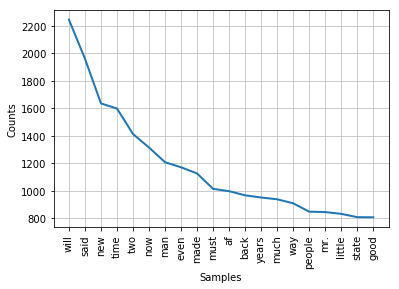

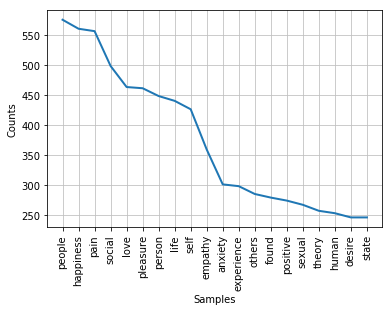

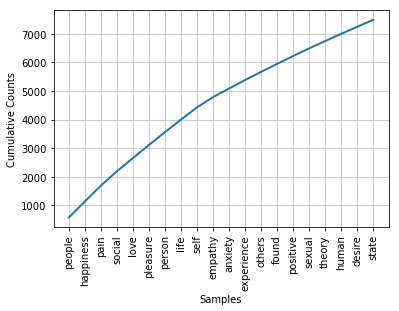

(True, True, True)

In [45]:
RC.plot(20), SC.plot(20), SC.plot(20, cumulative = True)

In [46]:
SC.tabulate(7)

   people happiness      pain    social      love  pleasure    person 
      575       560       556       498       463       461       448 


True

In [47]:
SC.get_top_frequents(10)

[('people', 575),
 ('happiness', 560),
 ('pain', 556),
 ('social', 498),
 ('love', 463),
 ('pleasure', 461),
 ('person', 448),
 ('life', 440),
 ('self', 426),
 ('empathy', 359)]

In [48]:
SC.get_least_frequents(10)

[('blackwell', 3),
 ('brad', 3),
 ('hackett', 3),
 ('mcdougall', 3),
 ('reverence', 3),
 ('precipitants', 3),
 ('pearsall', 3),
 ('haidt', 3),
 ('haidts', 3),
 ('atheists', 3)]

### 5.1 Number of unique words after cleaning 

In [49]:
n_Spec = SC.get_count_uniques()
n_Ref = RC.get_count_uniques()
print('Number of unique words: Specific = {}, Reference = {}'.format(n_Spec, n_Ref))

Number of unique words: Specific = 6414, Reference = 19898


### 5.2  Total word counts after cleaning 

In [50]:
s_Spec = SC.get_size()
s_Ref =  RC.get_size()
print('Total of words: Specific = {}, Reference = {}'.format(s_Spec, s_Ref))

Total of words: Specific = 107131, Reference = 478850


### 5.3 Displaying ordered list of terms

List of words in the corpus in case, for a visual inspection. Such inspections will be used both to improve tokenization as well as filtering.

In [51]:
SC.get_top_frequents(n_Spec)

[('people', 575),
 ('happiness', 560),
 ('pain', 556),
 ('social', 498),
 ('love', 463),
 ('pleasure', 461),
 ('person', 448),
 ('life', 440),
 ('self', 426),
 ('empathy', 359),
 ('anxiety', 301),
 ('experience', 298),
 ('others', 285),
 ('found', 279),
 ('positive', 274),
 ('sexual', 267),
 ('theory', 257),
 ('human', 253),
 ('desire', 246),
 ('state', 246),
 ('orgasm', 245),
 ('will', 244),
 ('individual', 242),
 ('research', 230),
 ('time', 223),
 ('psychological', 218),
 ('emotions', 218),
 ('emotional', 216),
 ('two', 214),
 ('study', 214),
 ('behavior', 213),
 ('flow', 208),
 ('individuals', 207),
 ('however', 206),
 ('another', 204),
 ('used', 203),
 ('psychology', 200),
 ('utilitarianism', 199),
 ('philosophy', 199),
 ('negative', 197),
 ('shame', 194),
 ('good', 191),
 ('see', 189),
 ('term', 187),
 ('associated', 185),
 ('even', 184),
 ('grief', 183),
 ('jealousy', 182),
 ('arousal', 182),
 ('depression', 181),
 ('part', 176),
 ('example', 176),
 ('feelings', 176),
 ('hope', 

### 5.4 Set of terms/words that occure in both corpus.

In [52]:
common_words = SC.intersection(RC)

In [53]:
pp.pprint(common_words)

['uses',
 'see',
 'part',
 'series',
 'thinkers',
 'de',
 'la',
 'fred',
 'younger',
 'pierre',
 'david',
 'yang',
 'schools',
 'christian',
 'key',
 'concepts',
 'happiness',
 'pain',
 'pleasure',
 'sensation',
 'suffering',
 'related',
 'articles',
 'paradox',
 'school',
 'thought',
 'argues',
 'primary',
 'important',
 'intrinsic',
 'goods',
 'aim',
 'human',
 'life',
 'strives',
 'net',
 'finally',
 'gained',
 'either',
 'remains',
 'ethical',
 'idea',
 'people',
 'right',
 'everything',
 'power',
 'achieve',
 'greatest',
 'amount',
 'possible',
 'every',
 'person',
 'far',
 'said',
 'started',
 'student',
 'held',
 'highest',
 'good',
 'history',
 'development',
 'civilization',
 'ancient',
 'egypt',
 'classic',
 'antiquity',
 'contemporary',
 'approaches',
 'scientific',
 'basis',
 'long',
 'term',
 'future',
 'criticisms',
 'reading',
 'name',
 'derives',
 'greek',
 'word',
 'delight',
 'according',
 'english',
 'sweet',
 'extremely',
 'strong',
 'original',
 'old',
 'version',


 'close',
 'male',
 'friendships',
 'subtle',
 'occur',
 'conventional',
 'plot',
 'coupled',
 'character',
 'describes',
 'mixture',
 'poems',
 'rose',
 'civil',
 'war',
 'soul',
 'worked',
 'beloved',
 'realized',
 'reality',
 'feels',
 'bitterness',
 'themes',
 'poetry',
 'mistress',
 'going',
 'bed',
 'ted',
 'savage',
 'cope',
 'seduction',
 'connected',
 'wrath',
 'examining',
 'worried',
 'issues',
 'sin',
 'depends',
 'mostly',
 'interaction',
 'highly',
 'emotional',
 'deal',
 'familial',
 'situations',
 'tragedy',
 'illness',
 'hardship',
 'filled',
 'tale',
 'domestic',
 'characters',
 'female',
 'audiences',
 'women',
 'chick',
 'fairly',
 'treating',
 'gone',
 'driving',
 'hero',
 'money',
 'vision',
 'lady',
 'butler',
 'builds',
 'burning',
 'ultimately',
 'keeps',
 'refuses',
 'advances',
 'secret',
 'worn',
 'spent',
 'visual',
 'plays',
 'focusing',
 'expectation',
 'post',
 'eye',
 'motivating',
 'section',
 'contains',
 'questionable',
 'relevance',
 'matter',
 'ple

 'proven',
 'designed',
 'entered',
 'purposes',
 'passive',
 'elicit',
 'actively',
 'met',
 'adds',
 'demands',
 'adjust',
 'skills',
 'knows',
 'graph',
 'channels',
 'meet',
 'performs',
 'contrary',
 'uneasiness',
 'persistence',
 'acquired',
 'opportunity',
 'habitual',
 'crowd',
 'musical',
 'informed',
 'gordon',
 'operator',
 'slow',
 'bored',
 'precisely',
 'complexity',
 'competitive',
 'discourage',
 'efficient',
 'pupil',
 'students',
 'psychologist',
 'observations',
 'instrument',
 'pieces',
 'pianist',
 'spite',
 'athletic',
 'advantage',
 'timothy',
 'mastery',
 'subconscious',
 'reflex',
 'improves',
 'master',
 'techniques',
 'attain',
 'respects',
 'formula',
 'car',
 'dimension',
 'victory',
 'sort',
 'race',
 'tested',
 'refined',
 'controls',
 'expert',
 'varied',
 'apply',
 'aid',
 'japanese',
 'traditions',
 'don',
 'virtually',
 'foster',
 'draws',
 'integrate',
 'thesis',
 'exploring',
 'readiness',
 'exhibited',
 'guided',
 'simplified',
 'modification',
 'a

In [54]:
len(common_words)

4866

### 5.5 Set of terms/words that occur in the sample but not in the reference corpus.

This specific set will be incorporated later below. 

In [71]:
print(len(input_specifics))

1548


In [57]:
pp.pprint(input_specifics)

{'abasement': 3,
 'abbreviated': 3,
 'abbreviation': 3,
 'abnormalities': 4,
 'abnormally': 8,
 'abolitionist': 4,
 'abrahamic': 4,
 'abusive': 3,
 'accessed': 6,
 'accommodation': 5,
 'accompanies': 5,
 'accumbens': 10,
 'acetylcholine': 8,
 'acknowledges': 5,
 'acknowledging': 5,
 'acknowledgment': 3,
 'activate': 10,
 'activates': 9,
 'activating': 13,
 'activist': 3,
 'activists': 3,
 'actualization': 6,
 'acupuncture': 4,
 'adaptive': 18,
 'addictive': 6,
 'adenylyl': 5,
 'adi': 4,
 'adjective': 3,
 'admits': 3,
 'adrenal': 6,
 'adrenaline': 7,
 'adrien': 4,
 'advaita': 5,
 'adversity': 6,
 'advocates': 13,
 'aerobic': 3,
 'affectionism': 4,
 'affective': 82,
 'affectivity': 3,
 'afflictions': 3,
 'affluent': 3,
 'aforementioned': 4,
 'afterlife': 3,
 'agape': 9,
 'agapo': 3,
 'aggregating': 3,
 'aggregation': 3,
 'agonist': 4,
 'agonists': 35,
 'agreeableness': 8,
 'ai': 16,
 'ajita': 8,
 'aladdin': 5,
 'alain': 3,
 'alertness': 6,
 'alexithymia': 6,
 'allah': 7,
 'allodynia': 4,

 'medial': 3,
 'median': 3,
 'mediate': 9,
 'mediated': 5,
 'mediates': 3,
 'mediating': 5,
 'medically': 3,
 'medication': 13,
 'medications': 13,
 'meditation': 8,
 'meher': 7,
 'mehrabian': 4,
 'melancholic': 5,
 'melancholics': 7,
 'mencius': 12,
 'meno': 3,
 'merriam': 4,
 'merrihew': 5,
 'mervyn': 3,
 'meslin': 4,
 'meta': 16,
 'metabolic': 7,
 'metabolism': 6,
 'methylphenidate': 8,
 'metric': 3,
 'metrodorus': 8,
 'mettrie': 8,
 'michel': 20,
 'micro': 4,
 'midbrain': 3,
 'migraine': 5,
 'mihly': 3,
 'mindedness': 6,
 'mindfulness': 5,
 'mini': 4,
 'mirroring': 4,
 'miscarriage': 3,
 'misconceptions': 4,
 'misfortunes': 3,
 'modeling': 3,
 'mohism': 13,
 'mollat': 3,
 'monoamine': 7,
 'monogamous': 5,
 'monogamy': 7,
 'montaigne': 9,
 'montessori': 3,
 'mormon': 3,
 'morphine': 6,
 'mort': 6,
 'mortification': 3,
 'motivate': 9,
 'motivational': 19,
 'motivator': 3,
 'mozi': 3,
 'mpi': 3,
 'mtaphysique': 3,
 'muhammad': 5,
 'multi': 9,
 'multidimensional': 5,
 'nagel': 3,
 'nan

## 7. Stemming

In [78]:
stemmer = PorterStemmer()
SC.set_stemmer(stemmer.stem)
RC.set_stemmer(stemmer.stem)

True

In [79]:
SC.get_stems()

{'aaron': 'aaron',
 'abandoning': 'abandon',
 'abasement': 'abas',
 'abbreviated': 'abbrevi',
 'abbreviation': 'abbrevi',
 'abdominal': 'abdomin',
 'abel': 'abel',
 'abilities': 'abil',
 'ability': 'abil',
 'able': 'abl',
 'abnormal': 'abnorm',
 'abnormalities': 'abnorm',
 'abnormally': 'abnorm',
 'abolition': 'abolit',
 'abolitionist': 'abolitionist',
 'abraham': 'abraham',
 'abrahamic': 'abraham',
 'absence': 'absenc',
 'absent': 'absent',
 'absolute': 'absolut',
 'absolutely': 'absolut',
 'absorbed': 'absorb',
 'absorption': 'absorpt',
 'abstract': 'abstract',
 'absurd': 'absurd',
 'abundance': 'abund',
 'abuse': 'abus',
 'abusive': 'abus',
 'abyss': 'abyss',
 'academic': 'academ',
 'accept': 'accept',
 'acceptable': 'accept',
 'acceptance': 'accept',
 'accepted': 'accept',
 'accepting': 'accept',
 'accepts': 'accept',
 'access': 'access',
 'accessed': 'access',
 'accessible': 'access',
 'accident': 'accid',
 'accidental': 'accident',
 'accidents': 'accid',
 'accommodate': 'accommod

In [81]:
RC.compute_stems()

True

In [82]:
RC.stems

{"'em": "'em",
 "'im": "'im",
 "'round": "'round",
 '**ya': '**ya',
 '**yb': '**yb',
 '**yc': '**yc',
 '**yf': '**yf',
 '**yl': '**yl',
 '**yt': '**yt',
 '**zg': '**zg',
 "a's": "a'",
 'a-z': 'a-z',
 'a.': 'a.',
 'a.b.': 'a.b.',
 'a.d.': 'a.d.',
 'a.l.a.m.': 'a.l.a.m.',
 'a.m.': 'a.m.',
 'a.m.a.': 'a.m.a.',
 'aaron': 'aaron',
 'ab': 'ab',
 'abandon': 'abandon',
 'abandoned': 'abandon',
 'abandoning': 'abandon',
 'abandonment': 'abandon',
 'abbe': 'abb',
 'abbey': 'abbey',
 'abdomen': 'abdomen',
 'abdominal': 'abdomin',
 'abe': 'abe',
 'abel': 'abel',
 'aberrant': 'aberr',
 'aberration': 'aberr',
 'aberrations': 'aberr',
 'abetted': 'abet',
 'abeyance': 'abey',
 'abide': 'abid',
 'abiding': 'abid',
 'abilities': 'abil',
 'ability': 'abil',
 'abject': 'abject',
 'ablaze': 'ablaz',
 'able': 'abl',
 'abnormal': 'abnorm',
 'abo': 'abo',
 'aboard': 'aboard',
 'abode': 'abod',
 'abolish': 'abolish',
 'abolition': 'abolit',
 'abolitionists': 'abolitionist',
 'aborigine': 'aborigin',
 'aborigin

In [86]:
input_specifics = SC.difference(RC)
print(len(input_specifics))

1548


### 7.1 Identfying matching stems within the reference corpus. 

Note that the frequency counts are transferred accordingly.

In [95]:
specifics = {k:v for k,v in input_specifics.items() if not RC.stemmer(k) in RC.stems.values()}
# Removing the words with matching stems from the specific set.
print("Reduction due to stem matches: ", len(input_specifics) - len(specifics))
input_specifics = specifics

Reduction due to stem matches:  0


# *from this point down has not been revised yet*
Bulent

## 8. Handling input specific term set

### 8.2 Removing open-maker specific terms.

In [96]:
with open("data/specifics_openmaker.txt", "r") as f:
    SPECIFICS_OPENMAKER = set(f.read().strip().split("\n"))
om_specific_stems = {stemmer.stem(k):k for k in SPECIFICS_OPENMAKER}
pp.pprint(om_specific_stems)

{'3-d': '3-d',
 '3d': '3d',
 'abat': 'abatement',
 'afford': 'affordable',
 'agenda21': 'agenda21',
 'anarch': 'anarchism',
 'autonom': 'autonomous',
 'biodiesel': 'biodiesel',
 'biodivers': 'biodiversity',
 'biofuel': 'biofuel',
 'bioga': 'biogas',
 'biomass': 'biomass',
 'biospher': 'biosphere',
 'bricolag': 'bricolage',
 'brundtland': 'brundtland',
 'c2c': 'c2c',
 'cad': 'cad',
 'cap-and-trad': 'cap-and-trade',
 'carfre': 'carfree',
 'cdm': 'cdm',
 'christensen': 'christensen',
 'co-creat': 'co-creation',
 'co-develop': 'co-develop',
 'co-invent': 'co-invention',
 'co-inventor': 'co-inventor',
 'coextinct': 'coextinction',
 'cognit': 'cognition',
 'commons-bas': 'commons-based',
 'computer-aid': 'computer-aided',
 'conferenc': 'conferencing',
 'consortium': 'consortium',
 'constraint': 'constraints',
 'construct': 'construct',
 'copyleft': 'copyleft',
 'copyright': 'copyright',
 'cradle-to-cradl': 'cradle-to-cradle',
 'crowdsourc': 'crowdsourcing',
 'crowdwork': 'crowdworker',
 'cuv

In [ ]:
specific_wset_dirty = {}
specific_wset_stems_selected = {}
for k,v in input_specifics.items():
    stem = stemmer.stem(k)
    if stem in om_specific_stems.keys():
        if k in specific_wset_stems_selected.keys():
            specific_wset_stems_selected[stem] += v
        else:
            specific_wset_stems_selected[stem] = v
        continue
    if v > 10:
        specific_wset_dirty[k] = v
        
input_specifics = specific_wset_dirty

In [ ]:
# The set of stems to be added to the set with makerness counts.
pp.pprint(specific_wset_stems_selected)

### 8.3 Remaining frequent input specifics
The manual checking can help to determine what should go into "specifics_openmaker.txt"

In [ ]:
print(len(input_specifics))
pp.pprint(sorted(input_specifics))

In [ ]:
specific_wset_stems = {}
for k,v in input_specifics.items():
    stem = stemmer.stem(k)
    if stem in specific_wset_stems.keys():
        specific_wset_stems[stem].append((k,v))
    else:
        specific_wset_stems[stem] = [(k,v)]
pp.pprint(specific_wset_stems)

## 9. Computing representation power of common words.

In [ ]:
# combine
word = []
freq = []
score = []
# common_words = [w[0] for w in common_words]
nSpec = 1.0 * n_Spec
nRef = 1.0 * n_Ref
for w in common_words:
    # Consider only words whose charcater length is larger than 1
    if len(w) > 1:
        # Log likelihood scores are computed:
        print(w, SC.tf_dist[w], RC.tf_dist[w])
        s = log((SC.tf_dist[w] / nSpec) / (RC.tf_dist[w] / nRef))
        f = SC.tf_dist[w]
        word.append(w)
        freq.append(f)
        score.append(s)

In [ ]:
m = pd.Series(score)
f = pd.Series(freq)
k = pd.Series(word)
stem = k.apply(stemmer.stem)
scoring = len(k) * ['common']
df_common = pd.DataFrame({'Word':k, 'Stem':stem, 'Score':m,'Tf':f, 'Type':scoring})
df_common.sort_values(by='Score', ascending=False, inplace = True)
df_common.reset_index(inplace=True, drop=True)
df_common.head(20)

### 9.1 Computing makerness of specific terms

In [ ]:
max_score = df_common.iloc[0,0]
threshold_score = 1.0
mean_w = df_common.Score[df_common.Score > threshold_score].mean()
mean_f = df_common.Tf[df_common.Score > threshold_score].mean()
print(max_score, threshold_score, mean_w, mean_f)

In [ ]:
def compute_speficif_score(f, maxw=10, minw=1, mean_w=3.0, mean_f=25.0):
    return(max(min((f / mean_f) * mean_w, maxw), minw))
compute_speficif_score(mean_w, max_score, threshold_score, mean_w, mean_f)

In [ ]:
stem = []
freq = []
score = []
for k, v in specific_wset_stems_selected.items():
    s = compute_speficif_score(v, max_score, threshold_score, mean_w, mean_f)
    stem.append(k)
    freq.append(v)
    score.append(s)

## 10. Tabulating the results and generating the output file

In [ ]:
m = pd.Series(score)
f = pd.Series(freq)
stem = pd.Series(stem)
scoring = len(m) * ['specific']
df_exclusive= pd.DataFrame({'Stem':stem, 'Score':m,'Tf':f, 'Type':scoring})
df_exclusive.sort_values(by='Score', ascending=False, inplace = True)
df_exclusive.reset_index(inplace=True, drop=True)
df_exclusive.head(20)

In [ ]:
df_makerness = df_common.append(df_exclusive, ignore_index=True)
df_makerness.sort_values(by='Score', ascending=False, inplace = True)
df_makerness.reset_index(inplace=True, drop=True)
df_makerness.head(25)

In [ ]:
df_makerness.tail(10)

In [ ]:
OUTPUT_FOLDER = "./output/"
csvfile_name = OUTPUT_FOLDER + "schwartz_" + OUTPUT_FNAME_PREFIX + ".csv"
with open(csvfile_name, 'w') as csvfile:
    #thewriter = csv.writer(csvfile, delimiter=',')
    #for k,v in sorted(makerness.items(), key=lambda x:x[1][0], reverse=True): thewriter.writerow([k,v[0],v[1]])
    df_makerness.to_csv(csvfile_name)

### 10.1 Outputfile name for the theme

In [ ]:
print(csvfile_name)

### 10.2 Selecting a specific range of scores

Note that with the function below a specific slice between a mix and max value can be determined. Besides, the filterin can be applied to any column as long as its data type is a number.


In [ ]:
def filter_rows(df, col = 'Score', min_t= None, max_t = None):
    """The method extracts rows from a Pandas data frame for the given score range.
    The scores above the minimum and below the maximum is selected.

    Note:
        This function should be generalized so that it can work on any predicate function.

    Args:
        df (:obj:`pandas.core.frame.DataFrame`): A Pandas data frame.
        col (:obj:`str`): The column that the filtering operation to be applied (default 'Score') 
        min_t (:obj:`float`): The minumum score threshold to be included when assigned (default None).
        max_t (:obj:`float`): The maximum score threshold to be included when assigned (default None).

    Returns:
        df (:obj:`pandas.core.frame.DataFrame`): A Pandas data frame.
    
    Raises:
            TypeError: Raised if the column data type is not a number.

    """
    col_type = str(df.dtypes[col])
    if not ('float' in col_type or 'int' in col_type):
        raise TypeError('Column type should be either int or float')
        
    if min_t:
        df = df.loc[df[col] >= min_t]
    
    if max_t:
        df = df.loc[df[col] <= max_t]
    
    return df

In [ ]:
min_t = 4
aslice = filter_rows(df_makerness, min_t = min_t)
reduced = '_min{}'.format(min_t)
filtered_csvfile_name = OUTPUT_FOLDER + "schwartz_" + OUTPUT_FNAME_PREFIX + reduced + ".csv"
aslice.to_csv(filtered_csvfile_name)
print(filtered_csvfile_name)

In [ ]:
#%connect_info